# Equations of motion of a pendulum-cart system using Lagrangian mechanics

Copyright (C) 2022 Richard Hacker

License: CC BY+SA 4.0

Source on [GitLab](https://gitlab.com/lerichi/applied-process-control-and-simulation/-/blob/main/Pendulum-cart%20simulation.ipynb)

This article can also be viewed on 
   * [nbviewer.org](https://nbviewer.org/urls/gitlab.com/lerichi/applied-process-control-and-simulation/-/raw/main/Pendulum-cart%20simulation.ipynb)
   * [GitLab Pages](https://lerichi.gitlab.io/applied-process-control-and-simulation/pendulum-cart-simulation.html)

## Introduction

In my search for a pendulum-cart simulation, I have yet to find a walk-through of deriving the equations of motion and subsequent application of these equations in a form accessible to readers. Usually, there is a link to [click here for the derivation] and now for simulation in [my exotic application]

In this article I hope to change this. I will carefully explain how to derive the general non-linear equations of motion and then use the readily available `jupyter notebook` with python3 backend.

The pendulum setup is shown in the following diagram.

## System description



The moving cart has mass *M* and is at position $x$ from the origin. A force *F* (the control force) accelerates the cart. Viscuous friction coefficient $d_x$ damps cart motion.

The pendulum mass is concentrated at $m$ on a stiff rod length *l*. The rod has angle *θ* to the vertical axis. Viscuous damping coefficient $d_\theta$ damps oscillations.

Various methods exist to derive equations of motion of such a system:
  * Classical mechanics (Newton's second law of motion): This is a vector equation describing acceleration $\vec{a}$ of a body with mass $m$ as a function of net force $\vec{F}$ acting on the body: $\sum \vec{F} = m\,\vec{a}$. On the one side it is intuitive and well understood (PHY101), but the disadvantage is that the vector equations become pretty messy from what I've seen.
  
  * Lagrangian mechanics: The Lagrangian is a scalar equation describing the difference between kinetic $K$ and potential $P$ energies in a system $L = K - P$, and then appying Euler-Lagrange equation to every degree of freedom in the coordinate system. Although the equations involve second derivatives of the states, it is fairly straightforward to use. Additionally, external driving forces and viscuous damping can be included in the equations.
  
  * Hamiltonian mechanics: This is also a scalar equation $H = \sum p_i\,\dot q_i - L$, describing the total energy in terms of momemtum $p$ on every dimension $q$, subtracting the Lagrangian $L$ and then applying Hamilton's equations to describe time evolution of the states. The resulting system of equations is a set of first order differetial equations, but the disadvantage is that external forces and damping are tricky to consider.
  
Whatever method is used, the equations of motion are identical since they describe the same system. We will be exploring Lagrangian mechanics in this article.


## Lagrangian mechanics

One method used to solve a general dynamical system like this is achieved using Lagrangian mechanics. The Lagragian equation

$$
L = K - P \label{eq1}
$$

describes the difference between kinetic and potential energy in the system, an abstract quantity with little physical relevance. *K* is the total kinetic energy and *P* the potential energy of the system.

Total kinetic energy of this system is is the kinetic energy of cart with mass $M$ and pendulum with mass $m$:

$$
\begin{align}
K &= K_{cart} + K_{pendulum}\\
K_{cart} &= \frac{1}{2}\,M\,\dot{x}^2\\
K_{pendulum} &= \frac{1}{2}\,m\left[(\underbrace{\dot x + l\,\dot\theta\,\cos{\theta}}_{x-\mathrm{component}})^2 + (\underbrace{l\,\dot\theta\,\sin{\theta}}_{y-\mathrm{component}})^2\right]
\end{align}
$$

Notice that the speed of the pendulum's mass consists of *x*- and *y*-components that need to be considered separately. The *x*-component is itself composed of the cart and angular velocities.

Only the pendulum's mass has potential energy:

$$
P = -m\,g\,l\,\cos{\theta}
$$

and thus the Lagrangian equation becomes

$$
L 
= \frac{1}{2}\,M\,\dot{x}^2 + \frac{1}{2}\,m\left[(\dot x + l\,\dot\theta\,\cos{\theta})^2 + (l\,\dot\theta\,\sin{\theta})^2\right]
+ m\,g\,l\,\cos{\theta}
$$

Now we apply the Euler-Lagrange equations of motion to the states $x$ and $\theta$.

### Euler-Lagrange equation for state *x*:

$$
\begin{align}
F_{ext} - d_x\,\dot x
&= \frac{d}{dt}\left\{\frac{\partial L}{\partial \dot x}\right\} - \frac{\partial L}{\partial x}\\
&= \frac{d}{dt}\left\{M\,\dot x + m\,(\dot x + l\,\dot\theta\,\cos{\theta})\right\}\\
&= (M + m)\,\ddot x + m\,l\,(\ddot\theta\,\cos\theta - \dot\theta^2\,\sin\theta)
\end{align}
$$

Rearranging and substituting

$$
F = m\,l\,\dot\theta^2\,\sin\theta - d_x\,\dot x
$$

gives us

$$
(M + m)\,\ddot x + m\,l\,\ddot\theta\,\cos\theta = F_{ext} + F
$$

### Euler-Lagrange equation for state *θ*:

$$
\begin{align}
- d_\theta\,\dot \theta
&= \frac{d}{dt}\left\{\frac{\partial L}{\partial \dot \theta}\right\} - \frac{\partial L}{\partial \theta}\\
&= m\,l\,\frac{d}{dt}\left\{\dot x\,\cos\theta + l\,\dot\theta\right\}
+ m\,l\,\sin\theta\,\left(g + \dot\theta\,\dot x \right)\\
&= m\,l\,\left(\ddot x\,\cos\theta + l\,\ddot\theta + g\,\sin\theta\right)
\end{align}
$$

Rearranging and substituting

$$
T = -m\,g\,l\,\sin\theta - d_\theta\,\dot\theta
$$

gives us

$$
m\,l\,\ddot x\,\cos\theta + m\,l^2\,\ddot\theta = T
$$

We now have two equations in $\ddot x, \ddot\theta$ that allows us to solve for them, replacing sine and cosine of the angle with their states, $s_\theta$ and $c_\theta$ respectively. This gives us the equations of motion of a pendulum-cart system:

$$
\begin{bmatrix} \ddot x \\ \ddot\theta \end{bmatrix}
= \dfrac{1}{M\,l + m\,l\,s_\theta^2}\,
\begin{bmatrix} 
      l         & -c_\theta\\
      -c_\theta & (M+m)\,(m\,l)^{-1}
\end{bmatrix}
\begin{bmatrix} F_{ext} + F\\ T \end{bmatrix}
$$

which is a second order ordinary differential equation.

## State transition function

To be able to simulate this system, we must first decompose this second order differential equation into a set of first order differential equations.

First, let's define a state vector for the system:

$$
\mathbf x
= \begin{bmatrix} \dot x \\ x \\ \dot\theta \\ c_\theta \\ s_\theta \end{bmatrix}
= \begin{bmatrix}
    \text{cart speed} \\
    \text{cart position} \\
    \text{pendulum angular speed} \\
    \text{cosine(pendulum angle)} \\
    \text{sine(pendulum angle)} \\
\end{bmatrix}
$$

Notice that instead of having pendulum angle θ as a state directly, we have its cosine and sine thereof as two individual states. In fact the last three states are those required to make an oscillator that has been treated in another article on a amplitude stabilized [Simple harmonic oscillator](Simple%20harmonic%20oscillator.ipynb).

Taking the derivative of the state vector and expressing the state derivates in terms of the states yields the state transition function as an ordinary differential equation:

$$
\mathbf{\dot x}
= \begin{bmatrix} \ddot x \\ \dot x \\ \ddot\theta \\ \dot c_\theta \\ \dot s_\theta \end{bmatrix}
= \begin{bmatrix}
    D^{-1}\,(l\,F - c_\theta\,T)\\
    \dot x\\
    D^{-1}\,[(M+m)\,(m\,l)^{-1}\,T - c_\theta\,F]\\
    \delta\,c_\theta - \dot\theta\,s_\theta \\
    \delta\,s_\theta + \dot\theta\,c_\theta \\
\end{bmatrix}
+ \frac{F_{ext}}{D}\,\begin{bmatrix}
    l\\
    0 \\
    -c_\theta\\
    0 \\
    0\\
\end{bmatrix}
$$

where:

$$
\begin{align}
\delta &= (1 - s_\theta^2 - c_\theta^2)(1 + s_\theta^2 + c_\theta^2)^{-1}\,T_s^{-1}\\
D &= M\,l + m\,l\,s_\theta^2\\
F &= -d_x\,\dot x + m\,l\,s_\theta\,\dot\theta^2\\
T &= -d_\theta\,\dot\theta - m\,l\,s_\theta\,g\\
T_s &= \text{sample time}\\
\end{align}
$$

Notice that $F_{ext}$ is exposed explicitly as a forcing function, or system input, in the differential equation. Furthermore, *D*, appearing as a denominator, is positive for all angles and non-zero cart mass.

No closed form solution exists for this differential equation except for trivial cases linearized about the upright and hanging positions. However, it can be integrated numerically given a starting point.

So, without wasting any more time, let's simulate a pendulum.

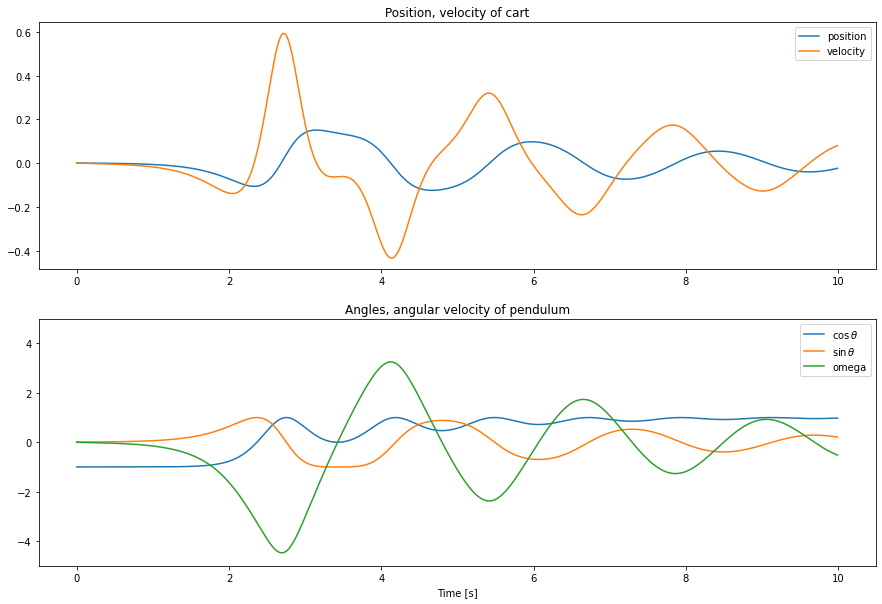

In [1]:
# Setup python environment

import numpy as np
import matplotlib.pyplot as plt
from contextlib import contextmanager, nullcontext
from lib.integrate import ode45
from dataclasses import dataclass

plt.rcParams['figure.figsize'] = [15,7]

def PendulumCart_Derivative(x_state, F_ext, pend, dT):
    v, x, w, c, s = x_state # decompose state vector
    
    ml = pend.m*pend.l
    
    A = c*c + s*s
    d = (1. - A)/(1. + A)/dT
    D = pend.l*(pend.M + pend.m*s*s)
    F = -pend.dx*v + ml*s*w*w
    T = -pend.dT*w - ml*s*pend.g
    
    return np.array(( (pend.l*(F + F_ext) - T*c)/D, # d/dt(v)
                     v, # d/dt(x)
                     ((pend.M + pend.m)*T/ml - (F + F_ext)*c)/D, # d/dt(w)
                     d*c - w*s, # d/dt(cos(θ))
                     d*s + w*c, # d/dt(sin(θ))
                   ))

@dataclass
class Pendulum:
    '''Class definition of pendulum constants'''
    
    M:  float = 10.  # Cart mass
    m:  float = 1.   # Pendulum mass
    l:  float = 1.5  # Pendulum length
    g:  float = 9.81 # Gravity
    dx: float = 5.   # Cart viscuous damping
    dT: float = 1.   # Pendulum viscuous damping

with ode45(derivative=lambda t, x, F, p, dT: PendulumCart_Derivative(x, F, p, dT),
           state=(0., 0., 0., -1., .01,), # Pendulum is upright
          ) as p:
    t = np.arange(10, step=0.01)
    pend = Pendulum()
    y = np.vstack([p.next(t_, 0., pend, .01) for t_ in t])
    #plotcart(t,y,pendulum.l)
    
    fig,ax = plt.subplots(2, figsize=(15,10))
    
    ax[0].plot(t, y[:,(1,0)])
    ax[0].legend(['position','velocity'])
    ax[0].set_title('Position, velocity of cart')
    
    ax[1].plot(t, y[:,(3,4,2)])
    ax[1].set_ylim((-5,5))
    ax[1].legend([r'$\cos\,\theta$',r'$\sin\,\theta$',r'omega'])
    ax[1].set_xlabel('Time [s]')
    ax[1].set_title('Angles, angular velocity of pendulum')    


The pendulum starts off upright (cos,sin = (-1,0)) and ends hanging down at (1,0), oscillating with decreasing amplitude